# Implementation of a  neural network on the MNIST dataset via tensorflow

First we import the requried libraries

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Next we load the mnist data set, and print the 5th test sample with its label as a one-hot vector

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
one-hot vector [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


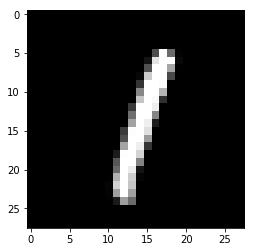

In [25]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('one-hot vector', mnist.test.labels[5])
plt.imshow(mnist.test.images[5].reshape((28, 28)), cmap="gray")
plt.show()

# Modeling of the computational graph/neural network

We first set a placeholder for the input of the neural network, and define the first hidden layer

In [26]:
x = tf.placeholder(tf.float32, [None, 784], name="data")
# first hidden layer
with tf.name_scope("layer1"):
    W1 = tf.Variable(tf.truncated_normal((784, 30), stddev=2/np.sqrt(784)),
                     name="W1")
    b1 = tf.Variable(tf.zeros([30]), name="b1")
    hidden1 = tf.matmul(x, W1)+b1
with tf.name_scope("ReLU1"):
    hidden1ReLU = tf.nn.relu(hidden1)

We do the same with the second, third hidden layer and the output layer

In [27]:
# second layer
with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.truncated_normal((30, 30), stddev=2/np.sqrt(30)),
                     name="W2")
    b2 = tf.Variable(tf.zeros([30]), name="b2")
    hidden2 = tf.matmul(hidden1ReLU, W2)+b2
with tf.name_scope("ReLU2"):
    hidden2ReLU = tf.nn.relu(hidden2)
# third layer
with tf.name_scope("output_layerrr"):
    W3 = tf.Variable(tf.truncated_normal((30, 10), stddev=2/np.sqrt(30)),
                     name="W3")
    b3 = tf.Variable(tf.zeros([10]), name="b3")
    # output layer
    Phi = tf.matmul(hidden2ReLU, W3)+b3

Next we define a loss function and a placeholder for the labels in the lossfunction

In [28]:
z = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=z,
                                                                 logits=Phi))

And in the last step of the modeling phase, we define which optimizer we choose, in this case  gradient descent with learningrate 0.5

In [29]:
learningrate = 0.5
train_step = tf.train.GradientDescentOptimizer(learningrate).minimize(loss)

# Training

Now we will train the network for 10000 epochs, with a batchsize of 100 samples

In [30]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for _ in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, z: batch_ys})

# Testing

Next we test and calculate the accuracy of our classifier

In [31]:
correct_prediction = tf.equal(tf.argmax(Phi, 1), tf.argmax(z, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                    z: mnist.test.labels}))

0.9625


Last but not least, we test our classifier on a given test sample

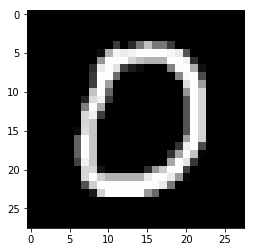

[[9.9999988e-01 2.0124167e-16 1.2724037e-07 4.3917897e-10 4.8021959e-10
  5.0284004e-09 3.9064407e-08 4.6223372e-12 4.3122289e-10 5.2331188e-09]]


In [32]:
plt.imshow(mnist.test.images[10].reshape((28, 28)), cmap="gray")
plt.show()
Z = Phi.eval(feed_dict={x: mnist.test.images[10].reshape(1, 784)})
print(sess.run(tf.nn.softmax(Z)))
sess.close()

As we can see, we have a prediction of 99.5 % that the digit in this image is a 0 !